In [31]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
TempData = pd.read_csv('AAPL.csv')
TempData.head(30)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,14.810000,14.617143,14.642857,14.765714,2.600220e+08,12.718646
1,2012-01-05,14.948214,14.738214,14.819643,14.929643,2.712696e+08,12.859850
2,2012-01-06,15.098214,14.972143,14.991786,15.085714,3.182928e+08,12.994284
3,2012-01-09,15.276786,15.048214,15.196429,15.061786,3.940244e+08,12.973674
4,2012-01-10,15.214286,15.053571,15.211071,15.115714,2.581964e+08,13.020121
5,2012-01-11,15.101786,14.975357,15.095714,15.091071,2.150848e+08,12.998899
6,2012-01-12,15.103571,14.955357,15.081429,15.049643,2.125872e+08,12.963211
7,2012-01-13,15.016071,14.952143,14.989286,14.993214,2.260216e+08,12.914607
8,2012-01-17,15.213929,15.105714,15.150000,15.167857,2.428972e+08,13.065036
9,2012-01-18,15.338214,15.225000,15.248571,15.325357,2.767912e+08,13.200701


In [70]:
TempData

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
1,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
3,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
4,2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,13.020121
...,...,...,...,...,...,...,...
2342,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999
2343,2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.580002
2344,2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996
2345,2021-04-30,133.559998,131.070007,131.779999,131.460007,109713200.0,131.460007


In [79]:
ts = TempData[[("Close"),('Date')]]
ts.set_index('Date')

,Close
Date,
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
2012-01-10,15.115714
...,...
2021-04-27,134.389999
2021-04-28,133.580002
2021-04-29,133.479996


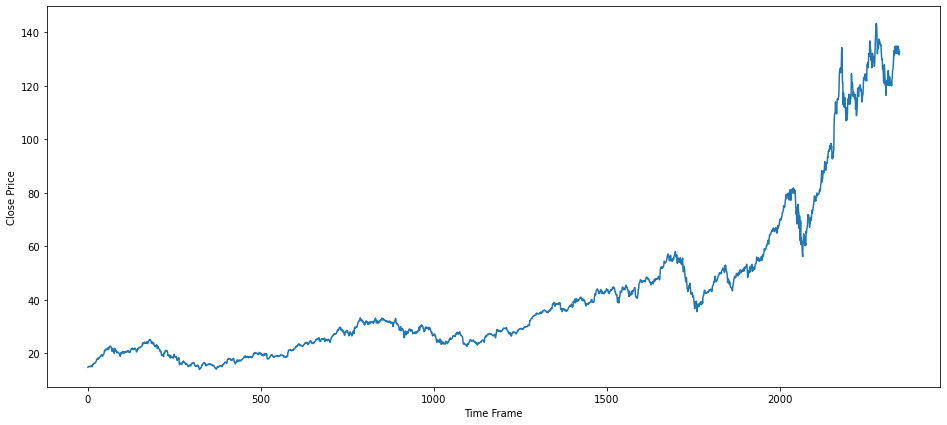

In [81]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Close Price')
ax1.plot(ts.Close)


In [83]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(ts.Close, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.8986070429559412
p-value: 0.998525774575582
Critial Values:
   1%, -3.433173007001078
Critial Values:
   5%, -2.8627871467151595
Critial Values:
   10%, -2.56743391172832


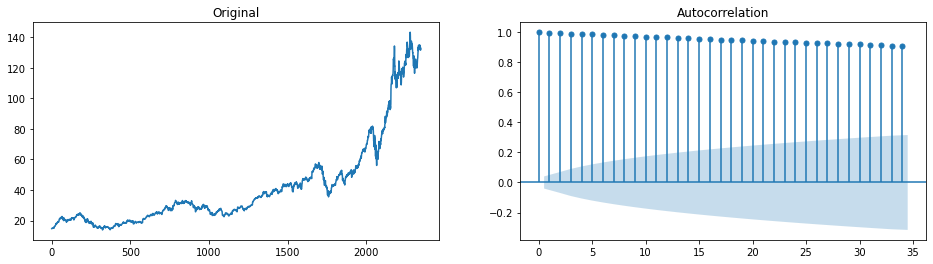

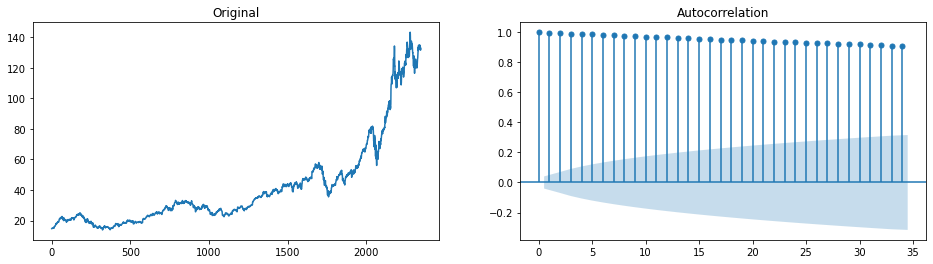

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
from statsmodels.graphics.tsaplots import plot_acf
ax1.plot(ts.Close)
ax1.set_title("Original")
plot_acf(ts.Close, ax=ax2)

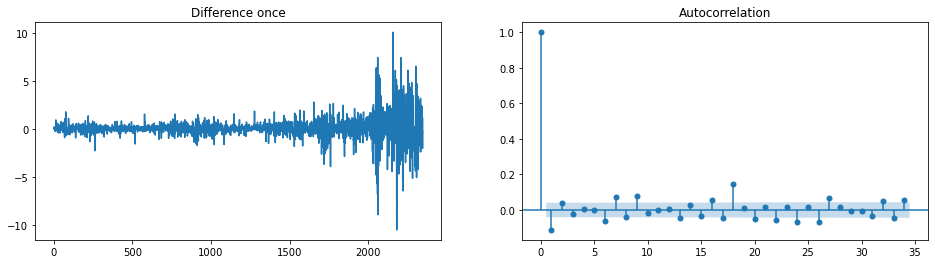

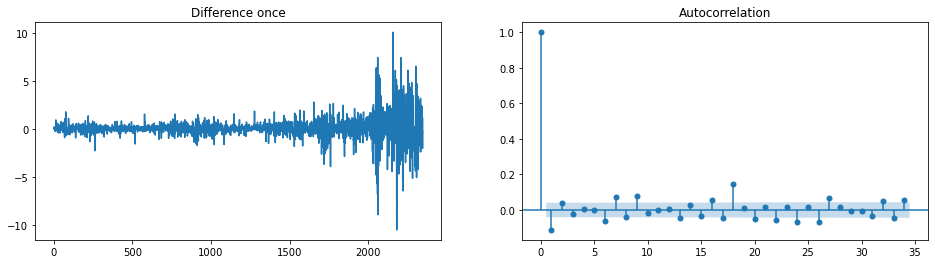

In [85]:
diff = ts.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

In [86]:
result = adfuller(ts.Close.diff().dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -9.440679346515083
p-value: 4.904401703660838e-16


In [87]:
ts.Close.diff().dropna()

1       0.163929
2       0.156072
3      -0.023929
4       0.053928
5      -0.024643
          ...   
2342   -0.330002
2343   -0.809998
2344   -0.100006
2345   -2.019989
2346    1.079987
Name: Close, Length: 2346, dtype: float64

In [92]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore') 
# ARIMA Model
model = ARIMA(ts.Close.diff().dropna(), order=(6, 1, 3))
result = model.fit(disp=0)


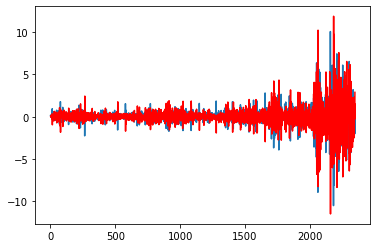

In [93]:
plt.plot(ts.Close.diff().dropna())
plt.plot(result.fittedvalues, color='red')

In [90]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2345
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -3476.738
Method:                       css-mle   S.D. of innovations              1.064
Date:                Fri, 07 May 2021   AIC                           6975.477
Time:                        22:44:35   BIC                           7038.837
Sample:                             1   HQIC                          6998.554
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.86e-05   3.01e-05      2.280      0.023    9.62e-06       0.000
ar.L1.D.Close    -1.9532      0.022    -89.384      0.000      -1.996      -1.910
ar.L2.D.Close    -1.1377      0.046    -

In [50]:
ARIMA_diff_predictions = pd.Series(result.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

2    0.000069
3    0.004631
4    0.140778
5    0.031975
6    0.106247
dtype: float64


In [51]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

2    0.000069
3    0.004699
4    0.145477
5    0.177452
6    0.283699
dtype: float64


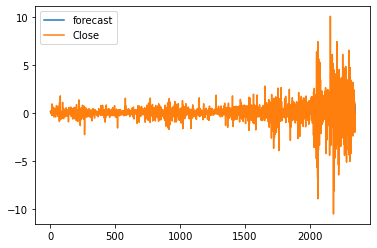

In [94]:
result.plot_predict(dynamic=False)
plt.show()

In [57]:
model = ARIMA(ts.Close, order=(6,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2346
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -3476.398
Method:                       css-mle   S.D. of innovations              1.065
Date:                Fri, 07 May 2021   AIC                           6974.797
Time:                        22:14:29   BIC                           7038.162
Sample:                             1   HQIC                          6997.876
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0501      0.022      2.321      0.020       0.008       0.092
ar.L1.D.Close    -1.0335      0.118     -8.761      0.000      -1.265      -0.802
ar.L2.D.Close     0.6559      0.228     

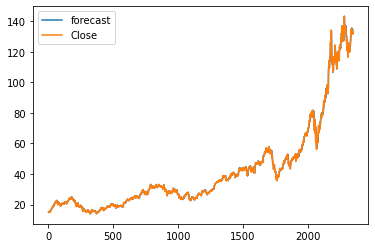

In [62]:
model_fit.plot_predict()
plt.figsize=(16,8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, ts.value)